# Introduction to Baby Names Data

What’s in a name? That which we call a rose, By any other name would smell as sweet.

In this project, we will explore a rich dataset of first names of babies born in the US, that spans a period of more than 100 years! This suprisingly simple dataset can help us uncover so many interesting stories, and that is exactly what we are going to be doing.

Let us start by reading the data.

In [46]:
# Import modules
import pandas as pd
import glob
# Read names into a dataframe: bnames
allFiles = sorted(glob.glob("names/yob*.txt"))

#print(allFiles)
#[print(file_) for file_ in allFiles]
length_of_files=len(allFiles)
#print(length_of_files)
bnames = pd.DataFrame()
list_ = []
i = 1880
for k in range(length_of_files):
    df = pd.read_table(allFiles[k], sep=",", header=None, index_col=None)
    df[3] = i+k
    list_.append(df)
    #print(df)
#for file_ in allFiles:
#    df = pd.read_table(file_, sep=",", header=None)
#    df[3] = i
#    list_.append(df)
bnames = pd.concat(list_, ignore_index=True)


In [50]:
bnames.columns = ["name", "sex", "births", "year"]
bnames

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


# Exploring Trends in Names

One of the first things we want to do is to understand naming trends. Let us start by figuring out the top five most popular male and female names for this decade (born 2011 and later). Do you want to make any guesses? Go on, be a sport!!

In [64]:
bnames_2010 = bnames.loc[bnames["year"]>2010]

bnames_2010_agg = bnames_2010.groupby(["sex","name"], as_index=False)['births'].sum()
#bnames_2010_agg
bnames_top_F = bnames_2010_agg.sort_values(["sex", "births"], ascending=[True, False]).groupby("name").head().reset_index(drop=True)
bnames_top5 = bnames_top_F[:5]
#bnames_top5
bnames_top_M = bnames_2010_agg.sort_values(["sex", "births"], ascending=[False, False]).groupby("name").head().reset_index(drop=True)
bnames_top5 = pd.concat([bnames_top5, bnames_top_M[:5]], ignore_index=True)
bnames_top5

,sex,name,births
0,F,Emma,121375
1,F,Sophia,117352
2,F,Olivia,111691
3,F,Isabella,103947
4,F,Ava,94507
5,M,Noah,110280
6,M,Mason,105104
7,M,Jacob,104722
8,M,Liam,103250
9,M,William,99144


# Proportion of Births

While the number of births is a useful metric, making comparisons across years becomes difficult, as one would have to control for population effects. One way around this is to normalize the number of births by the total number of births in that year.

In [88]:
bnames2 = bnames.copy()
total_births_by_year = bnames2.groupby("year")["births"].transform('sum')
bnames2['prop_births'] = bnames2['births']/total_births_by_year
bnames2

,name,sex,births,year,prop_births
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666
5,Margaret,F,1578,1880,0.007832
6,Ida,F,1472,1880,0.007306
7,Alice,F,1414,1880,0.007018
8,Bertha,F,1320,1880,0.006551
9,Sarah,F,1288,1880,0.006393


# Popularity of Names

Now that we have the proportion of births, let us plot the popularity of a name through the years. How about plotting the popularity of the female names Elizabeth, and Deneen, and inspecting the underlying trends for any interesting patterns!

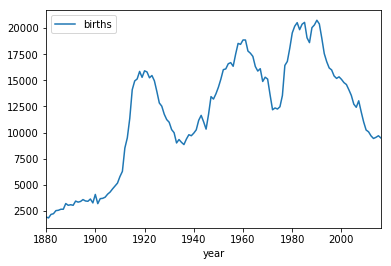

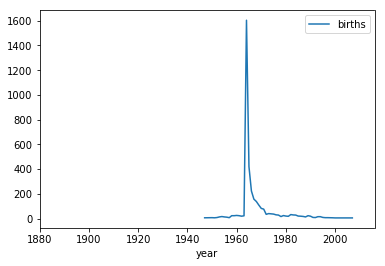

In [94]:
# Set up matplotlib for plotting in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trends(name, sex):
    data = bnames[(bnames.name == name) & (bnames.sex == sex)]
    ax = data.plot(x = "year", y = "births")
    ax.set_xlim(1880, 2016)
    return ax

# Plot trends for Elizabeth and Deneen
for name in ["Elizabeth", "Deneen"]:
    plot_trends(name, "F")

In [96]:

num_peaks_elizabeth = 4
num_peaks_deneen    = 1

# Trendy vs. Stable Names

Based on the plots we created earlier, we can see that Elizabeth is a fairly stable name, while Deneen is not. An interesting question to ask would be what are the top 5 stable and top 5 trendiest names. A stable name is one whose proportion across years does not vary drastically, while a trendy name is one whose popularity peaks for a short period and then dies down.

There are many ways to measure trendiness. A simple measure would be to look at the maximum proportion of births for a name, normalized by the sume of proportion of births across years. For example, if the name Joe had the proportions 0.1, 0.2, 0.1, 0.1, then the trendiness measure would be 0.2/(0.1 + 0.2 + 0.1 + 0.1) which equals 0.5.

Let us use this idea to figure out the top 10 trendy names in this data set, with at least a 1000 births.

In [99]:

names = pd.DataFrame()
name_and_sex_grouped = bnames.groupby(["name", "sex"])
names['total'] = name_and_sex_grouped["year"].sum()
names['max'] = name_and_sex_grouped["births"].max()
names['trendiness'] = names["max"]/names["total"]

top10_trendy_names = names.\
  loc[names['total'] > 1000].\
  sort_values(names["trendiness"], ascending=False).\
  head(10).\
  reset_index()

KeyError: '[ 0.11133816  0.20023838  0.50161732 ...,  1.          1.          1.        ] not in index'

In [102]:
names = pd.DataFrame()
name_and_sex_grouped = bnames.groupby(["name", "sex"])
names['total'] = name_and_sex_grouped["births"].sum()
names['max'] = name_and_sex_grouped["births"].max()
names['trendiness'] = names["max"]/names["total"]
names

,,total,max,trendiness
name,sex,,,
Aaban,M,96,16,0.166667
Aabha,F,35,9,0.257143
Aabid,M,10,5,0.500000
Aabir,M,5,5,1.000000
Aabriella,F,26,11,0.423077
Aada,F,5,5,1.000000
Aadam,M,236,22,0.093220
Aadan,M,122,23,0.188525
Aadarsh,M,184,18,0.097826


In [113]:
top10_trendy_names = names[names['total'] > 1000].sort_values("trendiness", ascending=False).head(10).reset_index()
#.sort_values(names["trendiness"], ascending=False)
#.head(10).reset_index()
#top10_trendy_names.sort_values(names["trendiness"], ascending=False)
top10_trendy_names

,name,sex,total,max,trendiness
0,Christop,M,1082,1082,1.000000
1,Royalty,F,1057,581,0.549669
2,Kizzy,F,2325,1116,0.480000
3,Aitana,F,1203,564,0.468828
4,Deneen,F,3602,1604,0.445308
5,Moesha,F,1067,426,0.399250
6,Marely,F,2527,1004,0.397309
7,Kanye,M,1304,507,0.388804
8,Tennille,F,2172,769,0.354052
9,Kadijah,F,1411,486,0.344437
